In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### brain_volume_ratio_to_baseline_____VS_____final diagnosischanges of each patient in each phase


#### sleep_brain_finaldxch.csv
#### 

In [2]:
com_col = ['Phase', 'RID', 'VISCODE','PTID','RID_Phase']
target = 'final_dxch'

In [3]:
sleep_brain_finaldxch = pd.read_csv('sleep_brain_finaldxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_finaldxch = sleep_brain_finaldxch[sleep_brain_finaldxch['final_dxch'].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_finaldxch

,RID,Phase,VISCODE,PTID,RID_Phase,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI2,v06,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI2,v11,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI2,v21,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI2,v41,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ADNI2,v51,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,6978,ADNI3,y1,021_S_6978,6978_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14741,6999,ADNI3,m12,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14742,6999,ADNI3,y1,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14743,7000,ADNI3,m12,035_S_7000,7000_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sleep_brain_finaldxch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14745 entries, 0 to 14744
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RID                             14745 non-null  int64  
 1   Phase                           14745 non-null  object 
 2   VISCODE                         13649 non-null  object 
 3   PTID                            14745 non-null  object 
 4   RID_Phase                       14745 non-null  object 
 5   NPIK1                           884 non-null    float64
 6   NPIK2                           883 non-null    float64
 7   NPIK3                           882 non-null    float64
 8   NPIK4                           882 non-null    float64
 9   NPIK5                           882 non-null    float64
 10  NPIK6                           883 non-null    float64
 11  NPIK7                           883 non-null    float64
 12  NPIK8                           

In [5]:
sleep_brain_finaldxch.columns

Index(['RID', 'Phase', 'VISCODE', 'PTID', 'RID_Phase', 'NPIK1', 'NPIK2',
       'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A',
       'NPIK9B', 'NPIK9C', 'NPIKTOT', 'insomnia', 'OSA', 'final_dxch',
       'DXCHANGE', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'Ventricles_reduction_per_year', 'Hippocampus_reduction_per_year',
       'wholebrain_reduction_per_year', 'Entorhinal_reduction_per_year',
       'Fusiform_reduction_per_year', 'ICV_reduction_per_year',
       'ABETA_reduction_per_year', 'TAU_reduction_per_year',
       'PTAU_reduction_per_year'],
      dtype='object')

### brain_biomarker______VS______final_dxch

In [6]:
col_lst = [ 'final_dxch','ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
bio_lst = [ 'final_dxch','ratio_ABETA_bl', 'ratio_TAU_bl','ratio_PTAU_bl']
brain_dxch = sleep_brain_finaldxch[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
#biomarkers to dxch
bio_dxch = sleep_brain_finaldxch[com_col + bio_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
df = brain_dxch.copy()
df2 = brain_dxch.copy()

In [7]:
df2['final_dxch'] = df2['final_dxch'].replace({'CN-MCI':'CN-AD','MCI-MCI':'MCI-AD'})

In [8]:
np.sum(df.isna())   # check nan

Phase                             0
RID                               0
VISCODE                           0
PTID                              0
RID_Phase                         0
final_dxch                        0
ratio_Ventricles_bl               0
ratio_Hippocampus_bl              0
ratio_WholeBrain_bl               0
ratio_Entorhinal_bl               0
ratio_Fusiform_bl                 0
Ventricles_reduction_per_year     0
Hippocampus_reduction_per_year    0
wholebrain_reduction_per_year     0
Entorhinal_reduction_per_year     0
Fusiform_reduction_per_year       0
ICV_reduction_per_year            0
dtype: int64

In [9]:
df2.groupby(target).count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
final_dxch,,,,,,,,,,,,,,,,
AD-AD,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292,292
CN-CN,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
MCI-AD,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028,2028
MCI-CN,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


In [10]:
df.groupby(target).count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
final_dxch,,,,,,,,,,,,,,,,
AD-AD,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
CN-CN,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
CN-MCI,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
MCI-AD,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867
MCI-CN,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
MCI-MCI,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161


- unselect the AD-MCI. Because TOO FEW data.
- the possible groups: ['AD-AD', 'CN-AD', 'CN-CN', 'CN-MCI', 'MCI-AD', 'MCI-CN','MCI-MCI']
- ['CN-AD', 'CN-CN', 'CN-MCI'] 
- ['MCI-AD', 'MCI-CN','MCI-MCI']

In [11]:
df2_2 = df2.loc[df2[target].isin(['CN-AD', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df2_2mci = df2.loc[df2[target].isin(['MCI-AD', 'MCI-CN'])].reset_index().drop(['index'],axis=1)
df2_2mci.shape

(2194, 17)

In [12]:
df_2cn = df.loc[df[target].isin(['CN-AD', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df_2cn.shape

(1369, 17)

In [13]:
df_3cn = df.loc[df[target].isin(['CN-AD', 'CN-CN', 'CN-MCI'])].reset_index().drop(['index'],axis=1)
df_3cn.shape     # works not that good

(1581, 17)

In [14]:
df_2mci = df.loc[df[target].isin(['MCI-AD', 'MCI-CN'])].reset_index().drop(['index'],axis=1)
df_2mci.shape

(1033, 17)

In [15]:
df_3mci = df.loc[df[target].isin(['MCI-AD', 'MCI-CN','MCI-MCI'])].reset_index().drop(['index'],axis=1)
df_3mci.shape

(2194, 17)

### undersampling and modeling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [16]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID','RID_Phase',target]

k=10

## 'CN-AD': 292, 'CN-CN': 292  (CN-AD include the renamed CN-MCI)
- not renamed-mix is better.

In [17]:
models(df2_2,drop_lst,target)

After undersampling data size is 584 ; Resampled dataset shape Counter({'CN-AD': 292, 'CN-CN': 292})

7 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.675, Test set f1-score: 0.632
          - saga_L1, Training set f1-score:0.675, Test set f1-score: 0.632
          - newton-cg_L2, Training set f1-score:0.675, Test set f1-score: 0.632
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.675, Test set f1-score: 0.632
          - saga_L1, Training set f1-score:0.675, Test set f1-score: 0.632
          - newton-cg_L2, Training set f1-score:0.675, Test set f1-score: 0.632
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.598, Test set f1-score: 0.577
          - saga_L1, Training set f1-score:0.675, Test set f1-score: 0.632
       

          - tree depth: 14.000. f1-score on training data: 0.989 f1-score on test data: 0.521
    - Random forest
          - 5trees. f1-score on training data: 0.949 f1-score on test data: 0.546
          - 10trees. f1-score on training data: 0.976 f1-score on test data: 0.607
          - 15trees. f1-score on training data: 0.996 f1-score on test data: 0.555
          - 20trees. f1-score on training data: 0.996 f1-score on test data: 0.589
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.590
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.598
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.598
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.581
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.581
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.589
          - 55trees. f1-score on training data: 1.000 f1-

# - ''CN-AD': 80, 'CN-CN': 80


- unscaled data RandomForest 25trees. f1-score on training data: 1.000 f1-score on test data: 0.690

In [18]:
models(df_2cn,drop_lst,target)

After undersampling data size is 160 ; Resampled dataset shape Counter({'CN-AD': 80, 'CN-CN': 80})

3 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.674, Test set f1-score: 0.638
          - saga_L1, Training set f1-score:0.674, Test set f1-score: 0.638
          - newton-cg_L2, Training set f1-score:0.674, Test set f1-score: 0.638
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.674, Test set f1-score: 0.590
          - saga_L1, Training set f1-score:0.674, Test set f1-score: 0.638
          - newton-cg_L2, Training set f1-score:0.674, Test set f1-score: 0.590
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.559, Test set f1-score: 0.656
          - saga_L1, Training set f1-score:0.674, Test set f1-score: 0.638
         

          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.690
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.657
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.656
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.656
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 75trees. f1-score on training data: 1.000 f1-score on test data: 0.625
          - 80trees. f1-score on training data: 1.000 f1-score on test data: 0.656
    

In [19]:
cv_models(df_2cn,drop_lst,target,k)

After undersampling data size is 160 ; Resampled dataset shape Counter({'CN-AD': 80, 'CN-CN': 80})

3 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.598
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.598
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.619
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.619
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.628
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.628
       - C = 1
          - lbf

          - 25trees. average weighted f1-score of 10-cross validation:0.611
          - 30trees. average weighted f1-score of 10-cross validation:0.613
          - 35trees. average weighted f1-score of 10-cross validation:0.607
          - 40trees. average weighted f1-score of 10-cross validation:0.606
          - 45trees. average weighted f1-score of 10-cross validation:0.619
          - 50trees. average weighted f1-score of 10-cross validation:0.619
          - 55trees. average weighted f1-score of 10-cross validation:0.613
          - 60trees. average weighted f1-score of 10-cross validation:0.618
          - 65trees. average weighted f1-score of 10-cross validation:0.618
          - 70trees. average weighted f1-score of 10-cross validation:0.618
          - 75trees. average weighted f1-score of 10-cross validation:0.618
          - 80trees. average weighted f1-score of 10-cross validation:0.605
          - 85trees. average weighted f1-score of 10-cross validation:0.599
          - 

In [ ]:
res = usampling_scale_data(df_2cn,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators =25, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with ( 25 trees)'
feature_importance(X,y,clf,10,title_label)

### - 'MCI-AD': 166, 'MCI-CN': 166 where (MCI-MCI are renamed to MCI-AD)
- original data, 40trees. average weighted f1-score of 10-cross validation:0.628
--- not that good as directly use MCI-AD and MCI-CN

In [21]:
cv_models(df2_2mci,drop_lst,target,k)

After undersampling data size is 332 ; Resampled dataset shape Counter({'MCI-AD': 166, 'MCI-CN': 166})

5 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.373
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.373
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.511
          - saga_L1, average weighted f1-score of 10-cross validation:0.327
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.511
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.528
          - saga_L1, average weighted f1-score of 10-cross validation:0.320
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.528
       - C = 1
          -

          - 25trees. average weighted f1-score of 10-cross validation:0.606
          - 30trees. average weighted f1-score of 10-cross validation:0.619
          - 35trees. average weighted f1-score of 10-cross validation:0.610
          - 40trees. average weighted f1-score of 10-cross validation:0.628
          - 45trees. average weighted f1-score of 10-cross validation:0.615
          - 50trees. average weighted f1-score of 10-cross validation:0.628
          - 55trees. average weighted f1-score of 10-cross validation:0.615
          - 60trees. average weighted f1-score of 10-cross validation:0.619
          - 65trees. average weighted f1-score of 10-cross validation:0.609
          - 70trees. average weighted f1-score of 10-cross validation:0.613
          - 75trees. average weighted f1-score of 10-cross validation:0.606
          - 80trees. average weighted f1-score of 10-cross validation:0.613
          - 85trees. average weighted f1-score of 10-cross validation:0.612
          - 

In [ ]:
res = usampling_scale_data(d2f_2mci,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators = 40, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (40 trees)'
feature_importance(X,y,clf,k,title_label)

### - 'MCI-AD': 112, 'MCI-CN': 112
- 30trees. average weighted f1-score of 10-cross validation:0.715

In [22]:
cv_models(df_2mci,drop_lst,target,k)

After undersampling data size is 332 ; Resampled dataset shape Counter({'MCI-AD': 166, 'MCI-CN': 166})

5 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.409
          - saga_L1, average weighted f1-score of 10-cross validation:0.337
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.409
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.618
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.618
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.641
          - saga_L1, average weighted f1-score of 10-cross validation:0.323
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.641
       - C = 1
          -

          - 25trees. average weighted f1-score of 10-cross validation:0.732
          - 30trees. average weighted f1-score of 10-cross validation:0.729
          - 35trees. average weighted f1-score of 10-cross validation:0.723
          - 40trees. average weighted f1-score of 10-cross validation:0.727
          - 45trees. average weighted f1-score of 10-cross validation:0.739
          - 50trees. average weighted f1-score of 10-cross validation:0.733
          - 55trees. average weighted f1-score of 10-cross validation:0.729
          - 60trees. average weighted f1-score of 10-cross validation:0.736
          - 65trees. average weighted f1-score of 10-cross validation:0.741
          - 70trees. average weighted f1-score of 10-cross validation:0.752
          - 75trees. average weighted f1-score of 10-cross validation:0.739
          - 80trees. average weighted f1-score of 10-cross validation:0.748
          - 85trees. average weighted f1-score of 10-cross validation:0.745
          - 

After undersampling data size is 332 ; Resampled dataset shape Counter({'MCI-AD': 166, 'MCI-CN': 166})

5 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
Hippocampus_reduction_per_year,0.177241,0.210325,0.194679,0.193137,0.185286,0.165044,0.169569,0.174704,0.149219,0.152106,0.178339
Ventricles_reduction_per_year,0.122864,0.091849,0.115754,0.110953,0.108686,0.143039,0.129935,0.135123,0.129318,0.136943,0.127040
ratio_Hippocampus_bl,0.115149,0.112412,0.092412,0.112829,0.127012,0.117522,0.118069,0.122996,0.115123,0.111382,0.121737
wholebrain_reduction_per_year,0.100880,0.095880,0.105021,0.112955,0.094291,0.102508,0.108333,0.102862,0.097489,0.106586,0.082877
ratio_Fusiform_bl,0.097253,0.086350,0.109370,0.104880,0.109683,0.083385,0.097863,0.102808,0.096822,0.102487,0.078880
Entorhinal_reduction_per_year,0.078761,0.075927,0.083411,0.080330,0.079034,0.079799,0.069625,0.071387,0.083978,0.071606,0.092510
ICV_reduction_per_year,0.076159,0.086368,0.072810,0.068193,0.063812,0.087131,0.075712,0.072340,0.087240,0.077453,0.070534
ratio_Entorhinal_bl,0.069314,0.067242,0.070161,0.056786,0.059789,0.067379,0.067495,0.079448,0.077658,0.067209,0.079974
Fusiform_reduction_per_year,0.066984,0.072966,0.069108,0.060107,0.066087,0.052316,0.067576,0.064101,0.069093,0.075811,0.072672
ratio_Ventricles_bl,0.048506,0.055795,0.051141,0.051036,0.060639,0.042883,0.048442,0.035085,0.043886,0.047577,0.048572


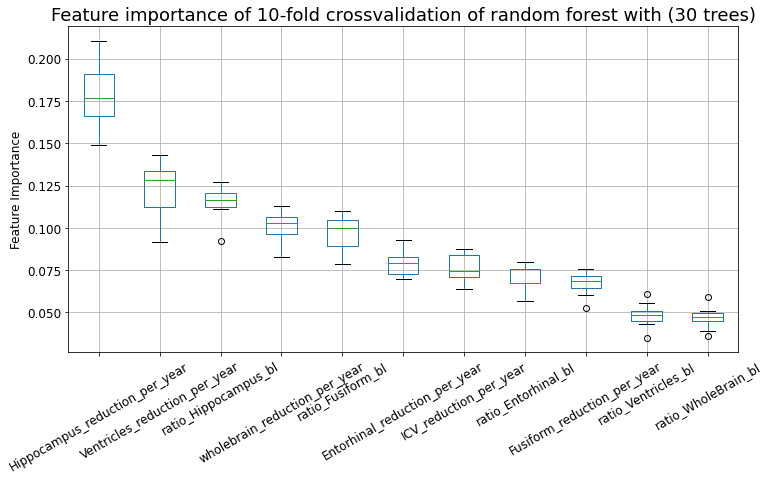

In [23]:
res = usampling_scale_data(df_2mci,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators = 30, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (30 trees)'
feature_importance(X,y,clf,k,title_label)

## - 'MCI-AD': 112, 'MCI-CN': 112, 'MCI-MCI': 112

NOT GOOD

In [24]:
models(df_3mci,drop_lst,target)

After undersampling data size is 498 ; Resampled dataset shape Counter({'MCI-AD': 166, 'MCI-CN': 166, 'MCI-MCI': 166})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.503, Test set f1-score: 0.468
          - saga_L1, Training set f1-score:0.495, Test set f1-score: 0.519
          - newton-cg_L2, Training set f1-score:0.503, Test set f1-score: 0.468
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.459, Test set f1-score: 0.512
          - saga_L1, Training set f1-score:0.504, Test set f1-score: 0.485
          - newton-cg_L2, Training set f1-score:0.459, Test set f1-score: 0.512
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.442, Test set f1-score: 0.513
          - saga_L1, Training set f1-score:0.504, Test set f1-sc

          - 10trees. f1-score on training data: 0.970 f1-score on test data: 0.547
          - 15trees. f1-score on training data: 0.997 f1-score on test data: 0.552
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.473
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.510
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.521
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.519
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.539
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.541
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.546
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.555
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.563
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.555
    

In [25]:
cv_models(df_3mci,drop_lst,target,k)

After undersampling data size is 498 ; Resampled dataset shape Counter({'MCI-AD': 166, 'MCI-CN': 166, 'MCI-MCI': 166})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.251
          - saga_L1, average weighted f1-score of 10-cross validation:0.165
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.251
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.339
          - saga_L1, average weighted f1-score of 10-cross validation:0.160
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.339
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.403
          - saga_L1, average weighted f1-score of 10-cross validation:0.208
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.403
       - C

KeyboardInterrupt: 